In [128]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.python.keras.layers import Conv2D
import tensorflow as tf

%matplotlib inline

In [157]:
img = cv2.imread("../img_test/6.jpg", cv2.IMREAD_COLOR)[..., ::-1]

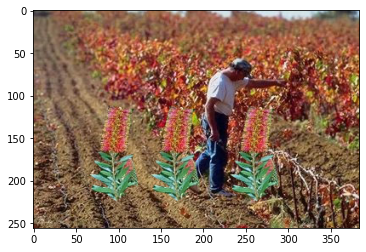

In [158]:
plt.imshow(img)

In [159]:
def _build_SRM_kernel():
    q = [4.0, 12.0, 2.0]
    filter1 = [[0, 0, 0, 0, 0],
               [0, -1, 2, -1, 0],
               [0, 2, -4, 2, 0],
               [0, -1, 2, -1, 0],
               [0, 0, 0, 0, 0]]
    filter2 = [[-1, 2, -2, 2, -1],
               [2, -6, 8, -6, 2],
               [-2, 8, -12, 8, -2],
               [2, -6, 8, -6, 2],
               [-1, 2, -2, 2, -1]]
    filter3 = [[0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0],
               [0, 1, -2, 1, 0],
               [0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0]]
    filter1 = np.asarray(filter1, dtype=float) / q[0]
    filter2 = np.asarray(filter2, dtype=float) / q[1]
    filter3 = np.asarray(filter3, dtype=float) / q[2]
    filters = [[filter1, filter1, filter1], [filter2, filter2, filter2], [filter3, filter3, filter3]]
    filters = np.einsum('klij->ijlk', filters)
    filters = filters.flatten()
    initializer_srm = tf.constant_initializer(filters)

    return initializer_srm

In [160]:
model = tf.keras.Sequential()
initializer_srm = _build_SRM_kernel()
model.add(Conv2D(3, [5, 5], trainable=False, kernel_initializer=initializer_srm,
                          activation=None, padding='same', strides=1))

In [161]:
img = img.astype('float32')

In [162]:
out = Conv2D(3, [5, 5], trainable=False, kernel_initializer=initializer_srm,
                          activation=None, padding='same', strides=1)(np.array([img]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


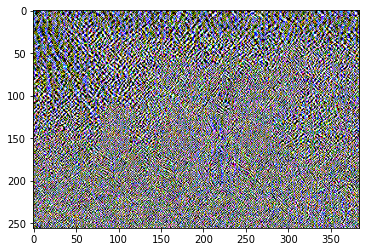

In [163]:
out = out.numpy()[0,:,:,:]
plt.imshow(out)